In [1]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import random
import string
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
f = open("Machine learning3.1.txt", 'r', errors = 'ignore')
f

<_io.TextIOWrapper name='Machine learning3.1.txt' mode='r' encoding='cp1252'>

In [3]:
raw=f.read()

In [4]:
raw

'Hi. Hi there. Hello. Hello there. Hello, I am fine buddy. Hi, I am fine buddy.\n\nI am doing fine, may I know your query.\nI am doin fine, may I know your query.  \nI am fine, may I know your query.\nWell then , lets get on with the work!.\nSo whats up at the workfront.\n\n\nOh great, so you have come at the right place to process your dataset.\n\n\n\nOh so lets solve your problem with the dataset\n\nWonderful , but can you tell me which specific machine learning algorithm type, classification, regression or deep learning?\n\nWonderful , but can you tell me which specific ML algorithm you would like to run, classification or regression or deep learning? \n\nWonderful , but can you tell me which specific Regression algorithm you would like to run?\n\nWonderful , but can you tell me which specific Classification algorithm would you like to run?\n\nWonderful , but can you tell me which specific deep learning algorithm you would like to run?\n\nWonderful, now can you tell me which specifi

In [5]:
raw=raw.lower()# converts to lowercase

In [6]:
sent_tokens = nltk.sent_tokenize(raw)

In [7]:
sent_tokens[:2]

['hi.', 'hi there.']

In [8]:
word_tokens = nltk.word_tokenize(raw)# converts to list of words

In [9]:
word_tokens[:5]

['hi', '.', 'hi', 'there', '.']

In [10]:
sent_tokens[:3]

['hi.', 'hi there.', 'hello.']

In [11]:
word_tokens[:5]

['hi', '.', 'hi', 'there', '.']

In [12]:
lemmer = nltk.stem.WordNetLemmatizer()

In [13]:
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

In [14]:
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [15]:
# GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey",)
# GREETING_RESPONSES = ["hi", "hey",  "hi there", "hello"]

In [16]:
import re
REGRESSION_INPUTS = ['Linear Regression','Linear', 'Decision Tree Regression' ,
                     'Support Vector Regression ', 'Lasso Regression', 'Lasso',
                     'Ridge Regression', 'Random Forest Regression']

CLASSIFICATION_INPUTS  = ['Logistic Regression', 'Logistic', 'Naive Bayes', 'Naive' , 
                          'Stochastic Gradient Descent','K-Nearest Neighbours',
                         'Decision Tree classifier','Decision Tree Classification', 'Random Forest classifier',
                          'Random Forest Classification', 'Support Vector Machine']

# DEEPLEARNING_INPUTS = ['Convolutional Neural Network', 'CNN', 'Long Short Term Memory Networks', 'LSTM',
#                        'Recurrent Neural Networks', 'RNN', 'BERT', 'Transfer Learning']




In [17]:
# def greeting(sentence):
#     """If user's input is a greeting, return a greeting response"""
#     for word in sentence.split():
#         if word.lower() in GREETING_INPUTS:
#             return random.choice(GREETING_RESPONSES)

In [18]:
def regAlgorithm(sentence):
#     r = re.compile(".*{}.*" .format(sentence))
#     matchedStr = str(filter(r.match, REGRESSION_INPUTS)) # Read Note below
#     print(matchedStr)
    count = 1
    for pattern in REGRESSION_INPUTS:
        
        if count <= len(REGRESSION_INPUTS):
        
            if re.search(pattern.lower(), sentence):
                
                    Robo_response = pattern + " Now please type name of the target or label in the box provided"
                    return pattern, Robo_response
                    
#             else:
#                     if count == len(REGRESSION_INPUTS):
#                           return "Could you be more specific!" 
                        
                    count = count+1
                    
print("length of regression list is: " ,len(REGRESSION_INPUTS))  

length of regression list is:  8


In [19]:
def claAlgorithm(sentence):
#     r = re.compile(".*{}.*" .format(sentence))
#     matchedStr = str(filter(r.match, REGRESSION_INPUTS)) # Read Note below
#     print(matchedStr)
    count = 1
    for pattern in CLASSIFICATION_INPUTS:
        
        if count <= len(CLASSIFICATION_INPUTS):
        
            if re.search(pattern.lower(), sentence):
                
                    Robo_response = pattern + " Now please type name of the target or label in the box provided"
                    return pattern, Robo_response
                    
#             else:
#                     if count == len(REGRESSION_INPUTS):
#                           return "Could you be more specific!" 
                        
                    count = count+1
                    
print("length of classification list is: " ,len(CLASSIFICATION_INPUTS))  

length of classification list is:  11


In [20]:
# def deepAlgorithm(sentence):
# #     r = re.compile(".*{}.*" .format(sentence))
# #     matchedStr = str(filter(r.match, REGRESSION_INPUTS)) # Read Note below
# #     print(matchedStr)
#     count = 1
#     for pattern in DEEPLEARNING_INPUTS:
        
#         if count <= len(DEEPLEARNING_INPUTS):
        
#             if re.search(pattern.lower(), sentence):
                    
#                     Robo_response = pattern +  " Now please provide the link for the image dataset"
#                     return pattern, Robo_response
                    
# #             else:
# #                     if count == len(REGRESSION_INPUTS):
# #                           return "Could you be more specific!" 
                        
#                     count = count+1
                    
# print("length of regression list is: " ,len(DEEPLEARNING_INPUTS))

In [21]:
def response(user_response):
    robo_response=''
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you, be more elaborative"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

In [22]:
# !pip install fontstyle
import fontstyle

In [23]:
import speech_recognition as SR
from pydub import AudioSegment as ADS
import pyttsx3

import random
import string

wav_file_path = "/Users/Admin/Desktop/python-jupyter-projects/Audio/audio-captured.wav"
mp3_file_path = "/Users/Admin/Desktop/python-jupyter-projects/Audio/audio-captured.mp3"

voice_recognizer = SR.Recognizer()
Mic = SR.Microphone()

def mic_recording():
    try:
        with Mic as source:
            
            miCCalibrate = "\nwait for the microphone to calibrate\n"
            miCCalibrate = fontstyle.apply(miCCalibrate, formatting = 'bold/red/INVERSE/2UNDERLINE/R')
                
            print(miCCalibrate)
            voice_recognizer.adjust_for_ambient_noise(source = source, duration = 0.5)
#             print("Set minimum energy threshold to {}".format(voice_recognizer.energy_threshold))

        # Capturing the audio & writing it to a file!
        while(True):
            with Mic as source:
                miCPleaseSay = "Please Say Something!"
                miCPleaseSay = fontstyle.apply(miCPleaseSay, formatting = 'bold/blue/INVERSE/2UNDERLINE/R')
                print(miCPleaseSay)
                audio_captured = voice_recognizer.listen(source)
#                 print("Captured It, Wait for a while, audio file Generation is in progress!")

            # Generating the Audio File to store the Audio
            with open(wav_file_path, "wb") as file:
                file.write(audio_captured.get_wav_data())

                # Converting WAV File to MP3 File
                WAV_File = ADS.from_file(wav_file_path, format = "wav")
                MP3_File = WAV_File.export(mp3_file_path, format = "mp3", bitrate = "320")
                break
            
        return audio_captured
    
    except KeyboardInterrupt:
        pass

In [24]:
import pandas as pd

def linkMatch():
    
    # def flagLink()
    csvFlag = False
    spreadFlag = False
    gitFlag = False
    onedFlag = False
    transModelFlag = False

    link_csv1 = r'https://docs.google.com/file.*'
    link_csv2 = r'https://drive.google.com/file.*'

    link_spread1 = r'https://docs.google.com/spreadsheets.*'
    link_spread2 = r'https://drive.google.com/spreadsheets.*'

    link_git = r'https://raw.githubusercontent.com.*'

    link_oneD = r'https://onedrive.live.com.*'


    if(re.search(link_csv1 , final_link) or re.search(link_csv2 , final_link)):
#           print("your csv link has matched")
          csvFlag = True
          
        
    elif(re.search(link_spread1, final_link) or re.search(link_spread2, final_link)):
#           print("your spreadsheet link has matched")
          spreadFlag = True
    elif(re.search(link_git, final_link)):
          gitFlag = True
    elif(re.search(link_oneD , final_link)):
          onedFlag = True
            
            
#     if (deepModelFlag == False) :

    if csvFlag == True:
        # print(final_link.split('/')[-2])
        url2 = "https://drive.google.com/uc?id=" + final_link.split('/')[-2]
        trainPredict(df)

    elif spreadFlag == True:

        gsheetkey = final_link.split('/')[-2]
        url2=f'https://docs.google.com/spreadsheet/ccc?key={gsheetkey}&output=xlsx'
        df = pd.read_excel(url2, sheet_name='Sheet1')
        trainPredict(df)

    elif gitFlag == True:

        df = pd.read_csv(final_link)
        trainPredict(df)

    else :

                c  = 10 + 5

#     else:
#             # !wget "https://onedrive.live.com/download?cid=86213B68AE250972&resid=86213B68AE250972%2129101&authkey=ANqUGrvowv3Jt7M" -O food_data.zip
#             trainPredictDeep()
        

#     print("csvFlag : %s "    %csvFlag)
#     print("spreadFlag : %s "  %spreadFlag)
#     print("gitFlag : %s "    %gitFlag)
#     print("onedFlag : %s "  %onedFlag)
#     print("trans Model Flag %s" %transModelFlag) 
    
    

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
# from sklearn.model_selection import GridSearchCV
# !pip install fontstyle


def trainPredict(rawData):

  # X = np.array([[]])
  # y = np.array([])

  if regModelFlag == True:
      from sklearn.model_selection import train_test_split

      X = rawData.drop(last_word_target, axis = 1)
      y = rawData[last_word_target].copy()

      X_train,X_test,y_train,y_test  = train_test_split(X,y, test_size = 0.2, random_state = 42)
      

      svrModel = SVR()
      dtrModel = DecisionTreeRegressor(max_depth=5,min_samples_leaf=3)
      rfrModel = RandomForestRegressor()
      linMod = LinearRegression()
      
      svrModel.fit(X_train, y_train)
      dtrModel.fit(X_train, y_train)
      rfrModel.fit(X_train, y_train)
      linMod.fit(X_train, y_train)

      
      y_predSvr = svrModel.predict(X_test)
      y_predDtr = dtrModel.predict(X_test)
      y_predRfr = rfrModel.predict(X_test)
      y_predLin = linMod.predict(X_test)

      txtregReport = "MEAN SQUARED ERROR : \nlinear MSE : {}\nSVR MSE : {}\nDTR MSE : {}\nRFR MSE : {}\n\n"
      # format text
      txtregReport = fontstyle.apply(txtregReport, 'bold/red/INVERSE/2UNDERLINE/R')
   
      txtregReport2 = "r2 SCORE: \nlinear r2 : {}\nSVR r2 : {}\nDTR r2 : {}\nRFR r2 : {} \n" 
      txtregReport2 = fontstyle.apply(txtregReport2, 'bold/blue/INVERSE/2UNDERLINE/R')


      from sklearn.metrics import  mean_squared_error
      print(txtregReport.format(mean_squared_error(y_predLin, y_test), mean_squared_error(y_predSvr, y_test) , mean_squared_error(y_predDtr, y_test),
                                                                                mean_squared_error(y_predRfr, y_test)))
      # "r2 score: \nlinear r2 : {}\nsvr r2 : {}\ndtr r2 : {}\nrfr r2 : {} \n" 
      from sklearn.metrics import r2_score
      print(txtregReport2.format(r2_score(y_predLin, y_test), r2_score(y_predSvr, y_test) , r2_score(y_predDtr, y_test),
                                                                            r2_score(y_predRfr, y_test)))
      
      import seaborn as sns
      import matplotlib.pyplot as plt
      # taking all rows but only 6 columns
      # df_small = df.iloc[:,:6]
      correlation_mat = rawData.corr()

      plt.figure(figsize = (10,10))
      
      sns.heatmap( correlation_mat, annot = True, center = True)
      plt.title("Correlation Matrix", fontsize = 20)

      plt.show()


      # print("Correlation Matrix : \n %s \n" %rawData.corr())

      

  elif (claModelFlag == True ):

      from sklearn.model_selection import train_test_split

      X = rawData.drop(last_word_target, axis = 1)
      y = rawData[last_word_target].copy()

      X_train,X_test,y_train,y_test  = train_test_split(X,y, test_size = 0.2, random_state = 42)


      svcModel = SVC()      
      sgdModel = SGDClassifier()      
      knnModel = KNeighborsClassifier(n_neighbors = 5)      
      naiveModel = GaussianNB()      
      dtcModel = DecisionTreeClassifier()      
      rfcModel = RandomForestClassifier()      
      logModel = LogisticRegression()

      svcModel.fit(X_train, y_train)
      # grid_svc.fit(X_train, y_train)
      dtcModel.fit(X_train, y_train)
      rfcModel.fit(X_train, y_train)
      naiveModel.fit(X_train, y_train)
      sgdModel.fit(X_train, y_train)
      knnModel.fit(X_train, y_train)
      # logModel.fit(X_train, y_train)

      y_predSVC = svcModel.predict(X_test)
      y_predDTC = dtcModel.predict(X_test)
      y_predRFC = rfcModel.predict(X_test)
      y_predNaiv =  naiveModel.predict(X_test)
      y_predSGD = sgdModel.predict(X_test)
      y_predKNN = knnModel.predict(X_test)
      # # y_predLOG = logModel.predict(X_test)

      from sklearn.metrics import  accuracy_score , confusion_matrix

      txtclaReport = "SVC Model : \naccuracy score : {}\n confusion_matrix : \n{}\n"
      # 'bold/red/INVERSE/2UNDERLINE/R'
      txtclaReport = fontstyle.apply(txtclaReport, formatting = 'bold/blue/INVERSE/2UNDERLINE/R')

      txtclaReport2 = "DTC Model : \naccuracy score : {}\n confusion_matrix : \n{}\n"
      txtclaReport2 = fontstyle.apply(txtclaReport2, formatting = 'bold/red/INVERSE/2UNDERLINE/R')

      txtclaReport3 = "RFC Model : \naccuracy score : {}\n confusion_matrix : \n{}\n" 
      txtclaReport3 = fontstyle.apply(txtclaReport3, formatting = 'bold/blue/INVERSE/2UNDERLINE/R')

      txtclaReport4 = "Naive Model : \naccuracy score : {}\n confusion_matrix : \n{}\n"
      txtclaReport4 = fontstyle.apply(txtclaReport4, formatting = 'bold/red/INVERSE/2UNDERLINE/R')

      txtclaReport5 = "SGD Model : \naccuracy score : {}\n confusion_matrix : \n{}\n"
      txtclaReport5 = fontstyle.apply(txtclaReport5, formatting = 'bold/blue/INVERSE/2UNDERLINE/R')

      txtclaReport6 = "KNN Model : \naccuracy score : {}\n confusion_matrix : \n{}\n"
      txtclaReport6 = fontstyle.apply(txtclaReport6, formatting = 'bold/red/INVERSE/2UNDERLINE/R')
     

      print(txtclaReport .format(accuracy_score(y_predSVC , y_test), confusion_matrix(y_predSVC , y_test)))
      print(txtclaReport2  .format(accuracy_score(y_predDTC , y_test), confusion_matrix(y_predDTC , y_test)))
      print(txtclaReport3 .format(accuracy_score(y_predRFC , y_test), confusion_matrix(y_predRFC , y_test)))
      print(txtclaReport4  .format(accuracy_score(y_predNaiv , y_test), confusion_matrix(y_predNaiv , y_test)))
      print(txtclaReport5  .format(accuracy_score(y_predSGD , y_test), confusion_matrix(y_predSGD , y_test)))
      print(txtclaReport6  .format(accuracy_score(y_predKNN , y_test), confusion_matrix(y_predKNN , y_test)))

#   elif(nlpModelFlag == True):

#       # rawData.drop("S", axis = 1, inplace = True)
#       from sklearn.preprocessing import LabelEncoder
#       Encoder = LabelEncoder()

#       rawData.drop(rawData.columns[0], axis = 1, inplace = True)
#       X = rawData.drop(last_word_target, axis = 1).squeeze()
#       y = rawData[last_word_target].copy().values

#       Sentiments = Encoder.fit_transform(y)
#       from tensorflow.keras.preprocessing.text import Tokenizer
#       tokenizer = Tokenizer()
#       tokenizer.fit_on_texts(X)
#       # tokenizer.word_counts
#       import seaborn as sns
#       import warnings
#       warnings.filterwarnings("ignore")
#       # from tensorflow.keras.preprocessing.text import Tokenizer
#       # tokenizer = Tokenizer()
#       # tokenizer.fit_on_texts(X)
#       feedback_sequences = tokenizer.texts_to_sequences(X)
#       vocabulary_size = len(tokenizer.word_counts)
#       vocabulary_size = vocabulary_size + 1
#       max_length_of_sequence = max([len(sequence) for sequence in feedback_sequences])
#       from tensorflow.keras.preprocessing.sequence import pad_sequences
#       padded_sequence = []

#       for sequence in feedback_sequences:
#           padded_sequence.append(pad_sequences([sequence], maxlen = max_length_of_sequence)[0])

#       from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
#       from tensorflow.keras.layers import SimpleRNN, Dense, Embedding
#       from tensorflow.keras.models import Sequential

#       RNN_MODEL = Sequential([
#                          Embedding(input_dim = vocabulary_size,
#                                    output_dim = padded_sequence[0].shape[0],
#                                    input_length = padded_sequence[0].shape[0]
#                                   ),

#                          SimpleRNN(units = 50),
    
#                          Dense(units = 2, activation = "sigmoid")
#                   ])
#       print(vocabulary_size)
#       print(padded_sequence[0].shape[0])
#       RNN_MODEL.summary()
#       Sentiments.shape

#       from tensorflow.keras.utils import to_categorical
#       Sentiments = to_categorical(Sentiments)
#       Sentiments[0:20, :]
#       RNN_MODEL.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
#       history = RNN_MODEL.fit(np.array(padded_sequence), Sentiments, epochs = 50)

#       txtNLPReport = fontstyle.apply("Sentiment Analysis Loss and Accuracy" , formatting = 'bold/red/INVERSE/2UNDERLINE/R')

#       print("\n                                               {}\n" .format(txtNLPReport))

#       RNN_MODEL.evaluate(np.array(padded_sequence), Sentiments, batch_size=32)

In [27]:
import random
import os
import matplotlib.pyplot as plt
def show_image(testing_data_path):
      random_class = random.choice(os.listdir(testing_data_path))
      random_image_path = testing_data_path + "/" + random_class
      random_image = random.choice(os.listdir(random_image_path))

      random_image = plt.imread(random_image_path + "/" + random_image)
      print("Image Shape: ", random_image.shape)
      plt.figure(figsize = (15, 9))
      plt.imshow(random_image)
      plt.title("Image Class = " + random_class)
      plt.axis(False)
      plt.show()

In [28]:
def plot_graphs(model_history, model_name, epoch_count = 10):
      plt.figure(figsize=(15,7))
      plt.plot(model_history.history["loss"], label = "loss")
      plt.plot(model_history.history["val_loss"], label = " val loss")
      plt.legend()
      plt.grid()
      plt.xlabel("epochs")
      plt.ylabel("Loss Quant")
      plt.xlim(-1, epoch_count)
      plt.title(model_name + " Loss Graph")
      plt.show()

      plt.figure(figsize = (15,7))
      plt.plot(model_history.history["accuracy"], label = "accuracy")
      plt.plot(model_history.history["val_accuracy"], label = "val accuracy")
      plt.legend()
      plt.grid()
      plt.xlabel("epochs")
      plt.ylabel("accuracy")
      plt.xlim(-1, epoch_count)
      plt.title(model_name + "Accuracy Graph" )
      plt.show()

ROBO: Hi, My name is Robo. I will generate your reports on all sorts of datasets. How may I help you today?

wait for the microphone to calibrate

Please Say Something!
ROBO:  Linear Regression Now please type name of the target or label in the box provided
medv
ROBO: So your target label would be medv  , seems good, now can you provide me link for the dataset in the box provided
https://raw.githubusercontent.com/vaksakalli/datasets/master/boston_housing.csv
ROBO: Thanks for the link, Wait for a few moments and you will get your complete report


MEAN SQUARED ERROR : 
linear MSE : 24.290463145792547
SVR MSE : 52.83835757091436
DTR MSE : 8.713005965529614
RFR MSE : 9.25680423529412


r2 SCORE: 
linear r2 : 0.6333405805312895
SVR r2 : -2.649494339032924
DTR r2 : 0.846232958239387
RFR r2 : 0.8498207047832675 



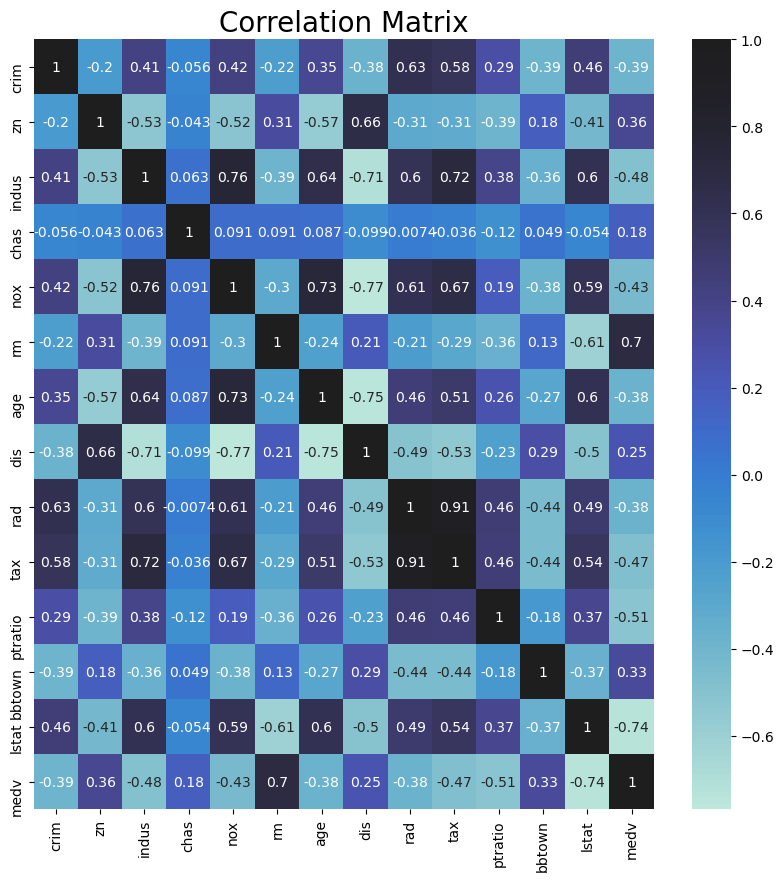

In [29]:
flag=True
regLabel = False
claLabel = False
deepLabel = False
linkFlag = False
normFlag = True
link_use_resp = False
user_response = ""



claModelFlag = False
regModelFlag = False
deepModelFlag  = False
# nlpModelFlag = False

target_label_box_input = ""
last_word_target = ""
typeMLalgo =""

link_box_text = ""


import time

import warnings 
warnings.filterwarnings(action= 'ignore')

print("ROBO: Hi, My name is Robo. I will generate your reports on all sorts of datasets. How may I help you today?" )

# with open("Audio/Google_recognized_text_start.txt", "r") as file:
#         text = file.read()
#         print("The opening statement" , text)
        

    
# Initializing the Text to Speech Engine
audio_engine = pyttsx3.init()

# Adding the work in the queue
audio_engine.say("Hi, My name is Robo. I will generate your reports on all sorts of datasets. How may I help you today  ?")

# Running the work added in the queue
audio_engine.runAndWait()

while(flag==True):
    
#     user_response = input()
       
#     user_response=user_response.lower()
    
    
    
    if ((regLabel == False and claLabel == False and  deepLabel == False and linkFlag == False)):
#   (regLabel == False and linkFlag == True)  or (regLabel == True and linkFlag == False) or       
        
            audio_captured = mic_recording()

            # Saving the text recognized by Google Library from the Speech
            with open("Audio/Google_recognized_text.txt", "w") as file:
                file.write(voice_recognizer.recognize_google(audio_captured))

            with open("Audio/Google_recognized_text.txt", "r") as file:
                user_response = file.read()

#             print("the user response is ", user_response)
    
    
    
    if(user_response=='bye'):
        flag=False
        bye_response = "ROBO: Bye! take care.."
        print("ROBO: Bye! take care..") 
        
        audio_engine = pyttsx3.init()

        # Adding the work in the queue
        audio_engine.say(bye_response)

        # Running the work added in the queue
        audio_engine.runAndWait()

    
    elif(user_response=='thanks' or user_response=='thank you' ):
#             flag=False
            thanks_response = "You are welcome."
    
            print("ROBO: You are welcome..")
    
            audio_engine = pyttsx3.init()

            # Adding the work in the queue
            audio_engine.say(thanks_response)

            # Running the work added in the queue
            audio_engine.runAndWait()
       
            
    
#             if(greeting(user_response)!=None):
                
#                 print("ROBO: "+greeting(user_response))
        
            
    elif(linkFlag == True):

#         link_use_resp = user_response

        pattern_link = r'https://.*'
        count_link = 1

        for final_link in link_box_text.split():

                if re.search(pattern_link, final_link):
                    
                    link_response_audio = f"Thanks for the link. Wait for a few moments and you will get your complete report"

                    print("ROBO: Thanks for the link, Wait for a few moments and you will get your complete report\n\n" .format(final_link))
                    
                    audio_engine = pyttsx3.init()

                    # Adding the work in the queue
                    audio_engine.say(link_response_audio)

                    # Running the work added in the queue
                    audio_engine.runAndWait()
                    
                    
                    linkFlag = False
                    flag = False
                    
#                     print("Final Link %s" %final_link)
#                     print("Target Label %s" %last_word_target)
#                     print("type of algorithm %s" %typeMLalgo)
#                     print("regModelFlag %s" %regModelFlag)
                    
                    linkMatch()
                    break
                else:

                    if (count_link == len(link_box_text.split())):
                        print("please provide the correct link")
                        audio_engine = pyttsx3.init()

                        # Adding the work in the queue
                        audio_engine.say("please provide the correct link in the box provided")

                        # Running the work added in the queue
                        audio_engine.runAndWait()
                        
                        link_box_text = input()
                        
#                         normFlag = True
                        break
                    else:
                        count_link = count_link + 1                   



    elif(regLabel == True):

            w = []
            
            

            for word in target_label_box_input.split():

                w.append(word)

                last_word_target = w[len(w)-1]

            Label_response_audio = "Thanks. Now can you provide me link for the dataset"
            
            print("ROBO: So your target label would be {}  , seems good, now can you provide me link for the dataset in the box provided" 
                  .format(last_word_target)) 
            
            
            
            audio_engine = pyttsx3.init()

            # Adding the work in the queue
            audio_engine.say(Label_response_audio)

            # Running the work added in the queue
            audio_engine.runAndWait()

            regLabel = False

            link_box_text = input()

            linkFlag = True 
            
    elif(claLabel == True):

            w = []

            for word in target_label_box_input.split():

                w.append(word)

                last_word_target = w[len(w)-1]


            Label_response_audio = "Thanks. Now can you provide me link for the dataset"
            
            print("ROBO: So '{}' would be your target/label , seems good, now can you provide me link for the dataset" 
                  .format(last_word_target)) 
            
            audio_engine = pyttsx3.init()

            # Adding the work in the queue
            audio_engine.say(Label_response_audio)

            # Running the work added in the queue
            audio_engine.runAndWait() 

            claLabel = False

            link_box_text = input() 
            linkFlag = True



#     elif(deepLabel == True):

#             w = []

#             for word in target_label_box_input.split():

#                 w.append(word)

#                 last_word_target = w[len(w)-1]


#             Label_response_audio = f"  So '{last_word_label}' would be your target/label , seems good, now can you provide me link for the dataset"
            
#             print("ROBO: So  '{}' would be your target/label , seems good, now can you provide me link for the dataset" 
#                   .format(last_word_label)) 
            
#             audio_engine = pyttsx3.init()

#             # Adding the work in the queue
#             audio_engine.say(Label_response_audio)

            # Running the work added in the queue
#             audio_engine.runAndWait()

#             deepLabel = False

#             link_box_text = input()
            
#             linkFlag = True 



    elif(regAlgorithm(user_response) != None) :                


            typeMLalgo, robo_response = regAlgorithm(user_response)
            regLabel = True
            
            regModelFlag = True

            
            print("ROBO: ", robo_response)
            
            
            
            audio_engine = pyttsx3.init()

            audio_engine.runAndWait()
            
            audio_engine = pyttsx3.init()

            # Adding the work in the queue
            audio_engine.say(robo_response)

            # Running the work added in the queue
            audio_engine.runAndWait()
            
            time.sleep(0.5)
            target_label_box_input = str(input())
            



#                     sent_tokens.append(user_response)

#                     word_tokens=word_tokens + nltk.word_tokenize(user_response)

#                     final_words=list(set(word_tokens))

#                     print("ROBO: ",end="")



#                     sent_tokens.remove(user_response)

    elif(claAlgorithm(user_response) != None) :                


            typeMLalgo, robo_response = claAlgorithm(user_response)
            claLabel = True
            
            claModelFlag = True

            print("ROBO: ", robo_response)
            
            audio_engine = pyttsx3.init()

            # Adding the work in the queue
            audio_engine.say(robo_response)

            # Running the work added in the queue
            audio_engine.runAndWait()
            
            time.sleep(0.5)
            target_label_box_input = str(input())
            

#     elif(deepAlgorithm(user_response) != None) :                


#             typeMLalgo, robo_response = deepAlgorithm(user_response)
#             deepLabel = True
#             deepModelFlag = True

#             print("ROBO: ", robo_response)
            
#             audio_engine = pyttsx3.init()

#             # Adding the work in the queue
#             audio_engine.say(robo_response)

#             # Running the work added in the queue
#             audio_engine.runAndWait()
            
#             time.sleep(0.5)
#             link_box_text = str(input())
#             linkFlag = True
            
# flag=True
# regAlgo = False
# claAlgo = False
# deepAlgo = False
# linkFlag = False
# normFlag = True            

#     elif((normFlag == True and regLabel == False) or (normFlag == True and claLabel == False ) 
#          or (normFlag == True and deepLabel == False)  or (normFlag == True and linkFlag == False) ) : 
        
    elif(normFlag == True and regLabel == False and claLabel == False and deepLabel == False and linkFlag == False):     

            sent_tokens.append(user_response)

            word_tokens=word_tokens+nltk.word_tokenize(user_response)

            final_words=list(set(word_tokens))

            print("ROBO: ",end="")

            print(response(user_response))
            
            audio_engine = pyttsx3.init()

            # Adding the work in the queue
            audio_engine.say(response(user_response))

            # Running the work added in the queue
            audio_engine.runAndWait()

            sent_tokens.remove(user_response)
          


In [30]:
# x for x in list if r.match(x)


In [31]:
# google drive = https://drive.google.com/file/d/1bcd1LbGMx-e69lkCPD8XUFyw9ooDpbrO/view?usp=sharing
# raw git = https://raw.githubusercontent.com/vaksakalli/datasets/master/boston_housing.csv
# spreadSheet =  https://docs.google.com/spreadsheets/d/1ljGvmO_XKznynm4RD9D9xunxqjh1gzcj/edit?usp=sharing&ouid=116254964515556037167&rtpof=true&sd=true
# deep = https://onedrive.live.com/download?cid=86213B68AE250972&resid=86213B68AE250972%2129101&authkey=ANqUGrvowv3Jt7M
# NLP link = https://drive.google.com/file/d/1x_K2xNAPm90WRB2apUpbO-9B6iD4b1Nt/view?usp=sharing